<a href="https://colab.research.google.com/github/anitakumarijena/Odia-English-Translation/blob/main/Samsung_Prism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NEW SECTION START**


In [1]:
!git clone https://github.com/anitakumarijena/Odia-Hindi-Translation


Cloning into 'Odia-Hindi-Translation'...
remote: Enumerating objects: 1417, done.
remote: Counting objects: 100% (551/551), done.
remote: Compressing objects: 100% (529/529), done.
remote: Total 1417 (delta 27), reused 528 (delta 19), pack-reused 866
Receiving objects: 100% (1417/1417), 604.14 MiB | 26.99 MiB/s, done.
Resolving deltas: 100% (112/112), done.
Checking out files: 100% (1161/1161), done.


In [2]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras import layers
import keras
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')


In [3]:
import pathlib
import os

**Data Visualisation and Exploration(EDA)**

In [4]:
import soundfile as sf

In [5]:
f = sf.SoundFile('Odia-Hindi-Translation/Odia/1..wav')
print('samples = {}'.format(len(f)))
print('sample rate = {}'.format(f.samplerate))
print('seconds = {}'.format(len(f) / f.samplerate))

samples = 197632
sample rate = 48000
seconds = 4.117333333333334


In [6]:
f = sf.SoundFile('Odia-Hindi-Translation/Odia/10..wav')
print('samples = {}'.format(len(f)))
print('sample rate = {}'.format(f.samplerate))
print('seconds = {}'.format(len(f) / f.samplerate))

samples = 124928
sample rate = 48000
seconds = 2.6026666666666665


In [7]:
f = sf.SoundFile('Odia-Hindi-Translation/English/eng1.wav')
print('samples = {}'.format(len(f)))
print('sample rate = {}'.format(f.samplerate))
print('seconds = {}'.format(len(f) / f.samplerate))

samples = 342427
sample rate = 44100
seconds = 7.764784580498866


In [8]:
f = sf.SoundFile('Odia-Hindi-Translation/English/eng2.wav')
print('samples = {}'.format(len(f)))
print('sample rate = {}'.format(f.samplerate))
print('seconds = {}'.format(len(f) / f.samplerate))

samples = 224667
sample rate = 44100
seconds = 5.094489795918367


In [9]:
f = sf.SoundFile('Odia-Hindi-Translation/Odia/o39.wav')
print('samples = {}'.format(len(f)))
print('sample rate = {}'.format(f.samplerate))
print('seconds = {}'.format(len(f) / f.samplerate))

samples = 195227
sample rate = 44100
seconds = 4.426916099773242


In [10]:
f = sf.SoundFile('Odia-Hindi-Translation/Odia/56..wav')
print('samples = {}'.format(len(f)))
print('sample rate = {}'.format(f.samplerate))
print('seconds = {}'.format(len(f) / f.samplerate))

samples = 330752
sample rate = 48000
seconds = 6.890666666666666


In [11]:
f = sf.SoundFile('Odia-Hindi-Translation/odiaeng/10.wav')
print('samples = {}'.format(len(f)))
print('sample rate = {}'.format(f.samplerate))
print('seconds = {}'.format(len(f) / f.samplerate))

samples = 89088
sample rate = 48000
seconds = 1.856


**FEATURE EXTRACTION**



          
  **SPECTRAL CENTROID**


<class 'numpy.ndarray'> <class 'int'>


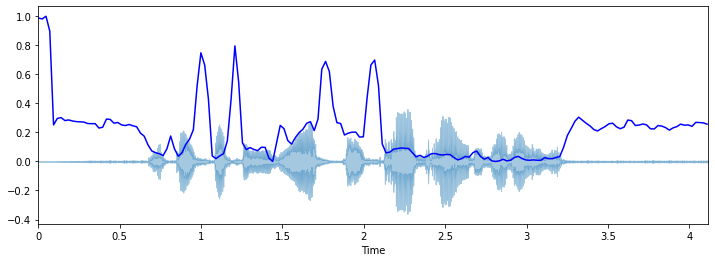

In [12]:
import librosa
import matplotlib.pyplot as plt

import librosa.display
import librosa
audio_data = 'Odia-Hindi-Translation/Odia/1..wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))


#Spectral Centroid
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

SPECTRAL ROLLOFF

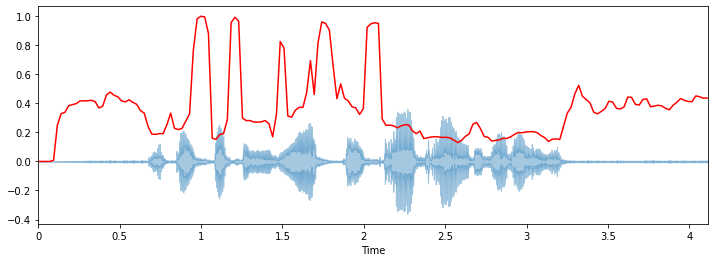

In [13]:
#Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

SPECTRAL BANDWIDTH

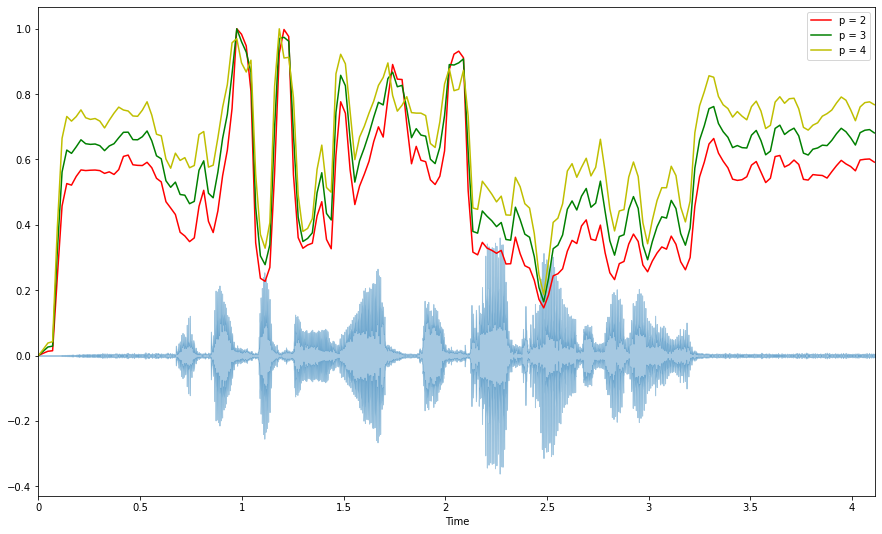

In [14]:
#Spectral Bandwidth
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

ZERO-CROSSING RATE

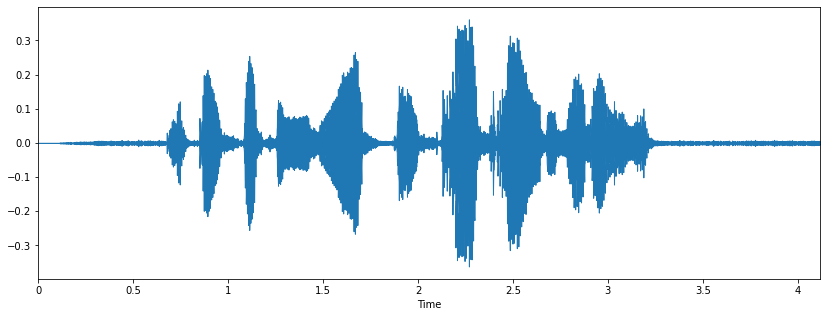

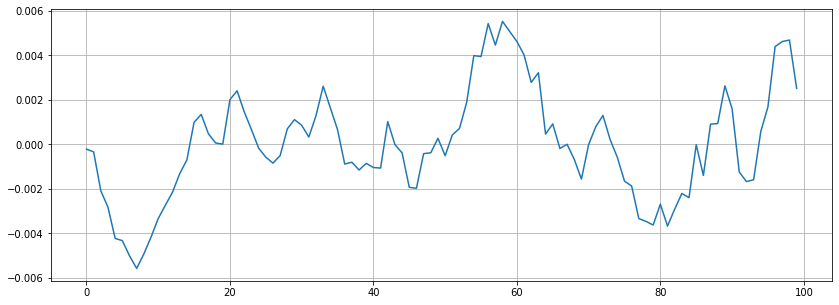

In [15]:
#Zero-Crossing Rate
x, sr = librosa.load('Odia-Hindi-Translation/Odia/1..wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

**SPECTROGRAM **

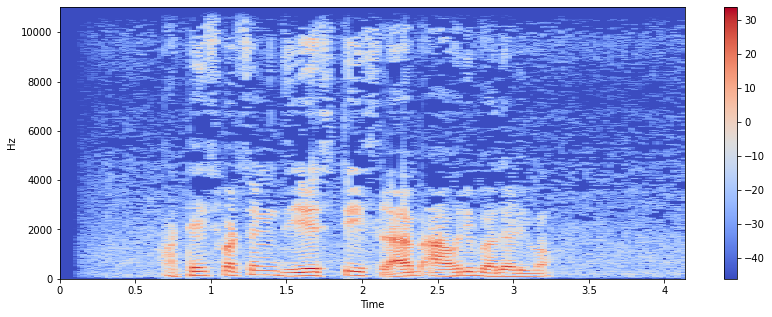

In [16]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

MFCCs(MEL FREQUENCY CEPSTRAL COEFFICIENTS)

(20, 178)


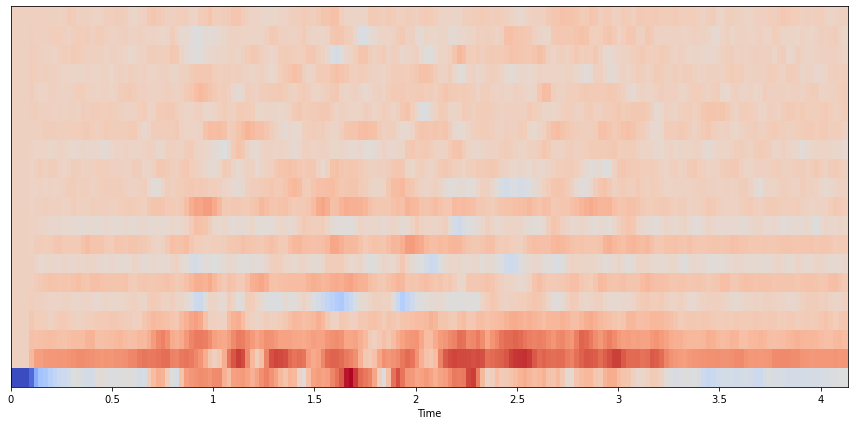

In [17]:
# Mel-Frequency Cepstral Coefficients(MFCCs)
mfccs = librosa.feature.mfcc(x, sr=2)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

CONVERTING VOICE DATASET INTO SPECTROGRAMS

In [18]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'English/  Odia/'.split()
for g in genres:
    pathlib.Path(f'/Odia-Hindi-Translation/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'/Odia-Hindi-Translation/{g}'):
        songname = f'/Odia-Hindi-Translation/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('on')
        plt.savefig(f'/Odia-Hindi-Translation/{g}/{filename[:-3].replace(".", "")}.png')
        
       
        plt.clf()
        

<Figure size 576x576 with 0 Axes>

In [19]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()


SAVING THE DATA IN A NEW FILE DATASET

In [20]:
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'English Odia'.split()
for g in genres:
    for filename in os.listdir(f'/content/Odia-Hindi-Translation/{g}'):
        songname = f'/content/Odia-Hindi-Translation/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse=librosa.feature.rms(y=y)[0]
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [21]:
df = pd.read_csv('dataset.csv',header=None,names=range(28))
print(df)

           0                    1   ...                    26       27
0    filename          chroma_stft  ...                mfcc20    label
1      43.wav   0.3612646460533142  ...    -3.640563488006592  English
2       2.wav   0.3651916980743408  ...   -0.9768768548965454  English
3      27.wav  0.44318053126335144  ...   -3.6598002910614014  English
4     123.wav  0.39173510670661926  ...    -5.671356201171875  English
..        ...                  ...  ...                   ...      ...
645    32.wav  0.37697702646255493  ...     4.072281360626221     Odia
646   o68.wav   0.4307691156864166  ...    1.0934910774230957     Odia
647   o67.wav   0.4443264901638031  ...  0.046055521816015244     Odia
648  100..wav  0.38907888531684875  ...     3.040705919265747     Odia
649    46.wav   0.4013482928276062  ...    1.6620445251464844     Odia

[650 rows x 28 columns]


In [22]:
data = pd.read_csv('dataset.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**MODELLING** 

In [23]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=500,
                    batch_size=500)


Epoch 1/500
2/2 [==============================] - 1s 9ms/step - loss: 2.4807 - accuracy: 0.1349
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 1.9963 - accuracy: 0.3969
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 1.5827 - accuracy: 0.7881
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 1.2154 - accuracy: 0.8786
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 0.9125 - accuracy: 0.8709
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 0.6896 - accuracy: 0.8574
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 0.5390 - accuracy: 0.8593
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 0.4331 - accuracy: 0.8767
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 0.3594 - accuracy: 0.8921
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 0.3128 - accuracy: 0.9094
Epoch 11/500
2/2 [==========

**Function to take image data convert audio then tell us that is odia or english**

In [25]:
print("Evaluate on test data")
results= model.evaluate(X_test, y_test, batch_size=500)
print("test loss, test acc:", results)

Evaluate on test data
1/1 [==============================] - 0s 161ms/step - loss: 0.1655 - accuracy: 0.9692
test loss, test acc: [0.16551899909973145, 0.9692307710647583]


In [26]:
model.evaluate(x=X_test, y=y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.1655 - accuracy: 0.9692


[0.16551899909973145, 0.9692307710647583]

In [27]:
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
predictions shape: (3, 10)


In [28]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'English/  Odia/ odiaeng/'.split()
for g in genres:
    pathlib.Path(f'/Odia-Hindi-Translation/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'/Odia-Hindi-Translation/{g}'):
        songname = f'/Odia-Hindi-Translation/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('on')
        plt.savefig(f'/Odia-Hindi-Translation/{g}/{filename[:-3].replace(".", "")}.png')
        
       
        plt.clf()

<Figure size 576x576 with 0 Axes>

In [29]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [34]:
file = open('dataset2.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'English Odia odiaeng'.split()
for g in genres:
    for filename in os.listdir(f'/content/Odia-Hindi-Translation/{g}'):
        songname = f'/content/Odia-Hindi-Translation/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse=librosa.feature.rms(y=y)[0]
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset2.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [35]:
data = pd.read_csv('dataset2.csv', error_bad_lines=False)
data.head(-5)

b'Skipping line 683: expected 28 fields, saw 29\nSkipping line 763: expected 28 fields, saw 29\nSkipping line 825: expected 28 fields, saw 29\nSkipping line 989: expected 28 fields, saw 29\n'


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,43.wav,0.361265,0.029519,1480.867396,2093.281309,3171.980819,0.050547,-386.832520,123.668686,31.615477,30.922382,5.155906,-9.725819,-11.668865,8.133703,-13.301126,-1.870758,0.744698,1.126218,-3.501870,0.136478,-2.769284,5.027063,-5.528944,5.418843,-2.826431,-3.640563,English
1,2.wav,0.365192,0.028679,1437.754440,2147.224407,2974.557725,0.035662,-403.026764,116.464920,29.119070,30.655970,19.072168,13.018191,-10.510113,0.336505,-4.969549,-3.061553,-6.639007,1.604007,-2.824191,4.364843,-0.313969,3.712976,-6.065626,1.049365,-5.339023,-0.976877,English
2,27.wav,0.443181,0.020695,1786.712136,2265.608585,3652.158989,0.081423,-407.305511,109.344025,33.297672,24.486866,-0.393284,-2.392992,-2.082748,7.602334,-3.479166,0.036468,-4.158985,4.054944,-2.760275,2.375397,-3.030036,7.507779,-4.314614,4.768245,-5.174094,-3.659800,English
3,123.wav,0.391735,0.032112,1725.221575,2176.231540,3595.908058,0.071862,-378.612091,118.191002,36.004459,22.985653,4.439753,-4.601851,-13.997128,2.148522,-6.500695,-2.518178,-0.874445,5.464296,1.838841,5.445722,0.878502,0.874606,-7.623915,1.598613,-6.335075,-5.671356,English
4,21.wav,0.463868,0.013307,3201.423256,2667.752632,6069.631457,0.181987,-430.298615,61.712555,36.335361,17.802866,-3.100196,17.161545,-6.559809,5.311936,-1.119055,-0.107932,-6.862823,11.060325,-5.795860,6.578906,-3.099075,6.316410,-4.306441,3.386755,-4.236588,0.216101,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,oe131.wav,0.482422,0.027952,1774.070920,2223.184323,3869.859175,0.050815,-345.171478,112.597061,16.686893,28.906664,14.176122,16.105785,-12.546472,17.946737,-8.932538,1.315786,-3.640738,0.337542,-1.614286,-0.128826,1.321360,4.573624,-4.370495,6.506904,0.475399,2.465615,odiaeng
1135,173..wav,0.343928,0.064475,1876.262645,2186.304281,3761.281574,0.078932,-308.645782,107.513420,6.839943,24.377752,-13.948963,-26.050993,3.121920,-25.506334,-11.059299,-13.392877,-10.936613,6.044674,-14.474081,-12.390207,6.829422,-11.823346,-11.863506,-0.263237,-15.843505,-2.884180,odiaeng
1136,oe6.wav,0.557457,0.013304,1519.477799,1996.996651,3142.842773,0.048385,-413.695770,132.407364,6.773044,26.260052,6.352349,19.158369,-2.175395,15.653991,-6.896079,7.125221,-2.951736,7.463013,-1.634177,2.058486,-1.156502,5.524186,-2.876419,6.426096,-1.251325,1.994559,odiaeng
1137,eo19.wav,0.294871,0.065148,1678.492286,2085.508484,3198.496316,0.068130,-352.454956,113.211342,19.558527,-10.214005,-17.995682,-17.289997,-0.696625,-27.549284,-14.222898,-11.347788,-22.133442,-15.794276,-17.834129,-13.399597,-21.033802,-8.552266,-15.929516,-13.207631,-15.093262,-8.028230,odiaeng


In [36]:

data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=500,
                    batch_size=500)

Epoch 1/500
2/2 [==============================] - 0s 12ms/step - loss: 2.4425 - accuracy: 0.1104
Epoch 2/500
2/2 [==============================] - 0s 12ms/step - loss: 2.1105 - accuracy: 0.3781
Epoch 3/500
2/2 [==============================] - 0s 12ms/step - loss: 1.8545 - accuracy: 0.7344
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 1.6075 - accuracy: 0.8350
Epoch 5/500
2/2 [==============================] - 0s 12ms/step - loss: 1.3578 - accuracy: 0.8492
Epoch 6/500
2/2 [==============================] - 0s 12ms/step - loss: 1.1202 - accuracy: 0.8579
Epoch 7/500
2/2 [==============================] - 0s 12ms/step - loss: 0.9113 - accuracy: 0.8546
Epoch 8/500
2/2 [==============================] - 0s 16ms/step - loss: 0.7373 - accuracy: 0.8656
Epoch 9/500
2/2 [==============================] - 0s 13ms/step - loss: 0.6013 - accuracy: 0.8776
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 0.4964 - accuracy: 0.8798
Epoch 11/500
2/2 [=

In [39]:
print("Evaluate on test data")
results= model.evaluate(X_test, y_test, batch_size=500)
print("test loss, test acc:", results)

Evaluate on test data
1/1 [==============================] - 0s 131ms/step - loss: 0.1231 - accuracy: 0.9694
test loss, test acc: [0.12313396483659744, 0.9694322943687439]


In [40]:
model.evaluate(x=X_test, y=y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.1231 - accuracy: 0.9694


[0.12313396483659744, 0.9694322943687439]

In [41]:
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
predictions shape: (3, 10)
